In [1]:
import numpy as np
import pandas as pd
iris=pd.read_csv('C://Users//Pratik//Desktop//iris.txt',sep=' ',header=None)
k=3

In [2]:
iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


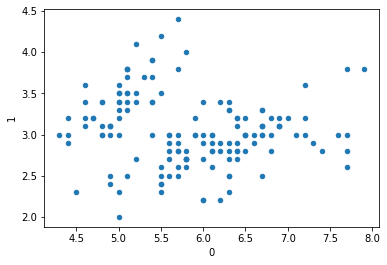

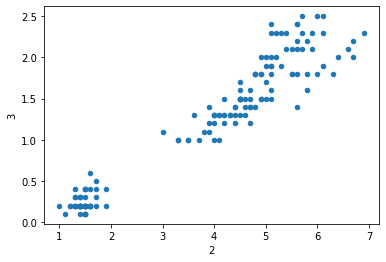

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig1=iris.plot(kind='scatter', x=0, y=1)
fig2=iris.plot(kind='scatter', x=2, y=3)

<AxesSubplot:>

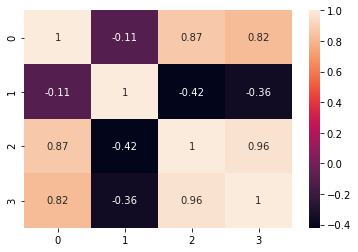

In [4]:
sns.heatmap(iris.corr(), annot=True)

In [5]:
#iris=iris.drop(columns=[0,1])

In [ ]:
#random centroid Initialization
'''from random import randint
cen=[iris.iloc[randint(0,len(iris))] for i in range(k)]'''

In [6]:
#Centroid Initialization based on distance
'''from random import randint
cen=pd.DataFrame([iris.iloc[randint(0,len(iris)-1)]])
max_dist=max([((iris-i)**2).sum(axis=1).max() for i in iris.values])
partition=max_dist/(k**2)
while len(cen)<k:
    pnt=iris.iloc[randint(0,len(iris)-1)]
    if (((cen-pnt)**2).sum(axis=1)>partition).all():
         cen=cen.append(pnt)'''

In [8]:
#calculate random SSE
'''random_sse=0
for i in range(len(iris)):
    random_sse+=((iris.iloc[i]-cen.iloc[randint(0,k-1)])**2).sum()
print(random_sse)'''

2054.6599999999994


In [7]:
#Euclidean distance
'''oasgn=None
asgn=np.zeros(len(iris))
while not((asgn==oasgn).all()):
    oasgn=asgn
    fin=pd.DataFrame([(((iris-cen.iloc[i])**2).sum(axis=1)**0.5) for i in range(k)])
    sse=fin.min().sum()
    asgn=fin.idxmin()+1
    cen=pd.DataFrame([iris.iloc[asgn.index[asgn==x].tolist()].mean() for x in range(1,k+1)])
print(sse)'''

55.388565479609625


<AxesSubplot:xlabel='2', ylabel='3'>

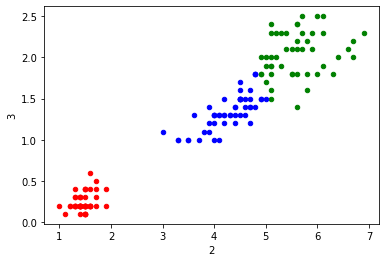

In [8]:
#plotting based on Euclidean distance (only column 2 & 3)
fig=iris[asgn==1].plot(kind='scatter',x=2,y=3,color='r')
iris[asgn==2].plot(kind='scatter',x=2,y=3,color='g',ax=fig)
iris[asgn==3].plot(kind='scatter',x=2,y=3,color='b',ax=fig)

In [5]:
from sklearn import preprocessing
iris = pd.DataFrame(preprocessing.Normalizer().fit_transform(iris))

In [6]:
from random import randint
cen=pd.DataFrame([iris.iloc[randint(0,len(iris)-1)]]) #random 1st centroid
max_dist=max([((iris-i)**2).sum(axis=1).max() for i in iris.values]) #max distance from 1st centroid
partition=max_dist/(k*20)
while len(cen)<k: #k-1 other centroids on basis of distance
    pnt=iris.iloc[randint(0,len(iris)-1)]
    if (((cen-pnt)**2).sum(axis=1)>partition).all():
         cen=cen.append(pnt)

In [7]:
'''Cosine Similarity'''
oasgn=None
asgn=pd.DataFrame(np.zeros(len(iris)))
while not((asgn==oasgn).all().all()):
    oasgn=asgn
    asgn=pd.DataFrame([iris.dot(x.T) for x in cen.values]).T.idxmax(axis=1)+1
    cen=pd.DataFrame([iris.iloc[asgn.index[asgn==x].tolist()].mean() for x in range(1,k+1)]) #recalculate centroid

<AxesSubplot:xlabel='2', ylabel='3'>

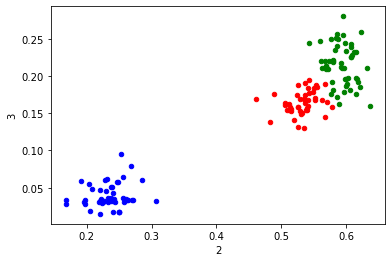

In [8]:
#plotting based on Cosine Similarity (normalized data)
fig=iris[asgn==1].plot(kind='scatter',x=2,y=3,color='r')
iris[asgn==2].plot(kind='scatter',x=2,y=3,color='g',ax=fig)
iris[asgn==3].plot(kind='scatter',x=2,y=3,color='b',ax=fig)

In [ ]:
pd.DataFrame(asgn).to_csv(path_or_buf='C:\\\\Users\\\\Pratik\\\\Desktop\\\\submission.txt',header=False,index=False,index_label=None,mode='w')

Text(0.5, 1.0, 'SSE vs no. of Clusters')

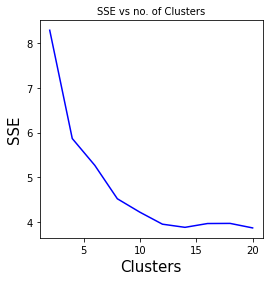

In [74]:
from sklearn.metrics.pairwise import euclidean_distances
sselist=[]
for k in range(2,21,2): #for k : 2 to 20
    cen=pd.DataFrame([iris.iloc[randint(0,len(iris)-1)]])
    while len(cen)<k:
        flag=True
        for i in iris.values:
            if ((euclidean_distances(pd.DataFrame(i).T,cen))[0]>partition/(k/100)).all():
                cen=cen.append(pd.DataFrame(i).T)
                flag=False
                break
        if flag:
            cen=pd.DataFrame([iris.iloc[randint(0,len(iris)-1)]])
    oasgn=None
    asgn=np.zeros(len(iris))
    while not((asgn==oasgn).all()):
        oasgn=asgn
        fin=pd.DataFrame(euclidean_distances(iris,cen))
        asgn=fin.idxmin(axis=1)
        cen=pd.DataFrame([iris.iloc[asgn.index[asgn==x].tolist()].mean() for x in range(k)])
    sselist.append(fin.min(axis=1).sum())
fig= plt.subplots(figsize=(4,4))
plt.plot(range(2,21,2),sselist,color='b')
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.title('SSE vs no. of Clusters', fontsize=10)